In [1]:
# Reimportando bibliotecas após o reset
import matplotlib.pyplot as plt
import numpy as np

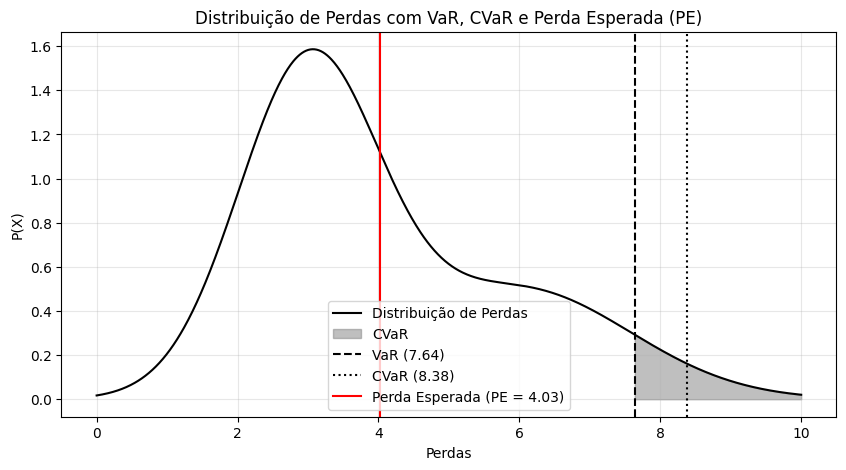

In [2]:


# Definindo a função de densidade de probabilidade (hipotética) para as perdas
def pdf(x):
    return 1.5 * np.exp(-0.5 * (x - 3)**2) + 0.5 * np.exp(-0.2 * (x - 6)**2)

# Gerando dados
x = np.linspace(0, 10, 1000)
y = pdf(x)

# Cálculo da Perda Esperada (PE)
pe = np.trapz(x * y, x) / np.trapz(y, x)

# Definindo o nível de confiança para o VaR
confidence_level = 0.95
cumulative = np.cumsum(y) / np.sum(y)

# Encontrando o VaR e CVaR
var_index = np.argmax(cumulative >= confidence_level)
var = x[var_index]
cvar = np.trapz(x[var_index:] * y[var_index:], x[var_index:]) / np.trapz(y[var_index:], x[var_index:])

# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Distribuição de Perdas", color='black')
plt.fill_between(x, y, where=(x >= var), color='grey', alpha=0.5, label="CVaR")
plt.axvline(var, color='black', linestyle='--', label=f"VaR ({var:.2f})")
plt.axvline(cvar, color='black', linestyle=':', label=f"CVaR ({cvar:.2f})")
plt.axvline(pe, color='red', linestyle='-', label=f"Perda Esperada (PE = {pe:.2f})")

# Ajustes do gráfico
plt.title("Distribuição de Perdas com VaR, CVaR e Perda Esperada (PE)")
plt.xlabel("Perdas")
plt.ylabel("P(X)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


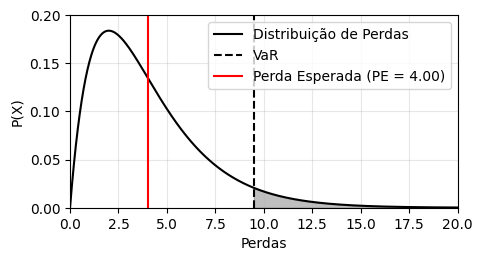

In [ ]:
# Corrigindo o cálculo do CVaR para a distribuição Gamma
from scipy.stats import gamma

# Parâmetros da distribuição Gamma (alpha=k, scale=theta)
shape_param = 2  # k (shape)
scale_param = 2  # θ (scale)

# Gerando dados para a distribuição Gamma
x = np.linspace(0, 20, 1000)
y = gamma.pdf(x, a=shape_param, scale=scale_param)

# Cálculo da Perda Esperada (PE) para a distribuição Gamma
pe = shape_param * scale_param

# Nível de confiança para o VaR
confidence_level = 0.95

# Cálculo do VaR para a distribuição Gamma
var = gamma.ppf(confidence_level, a=shape_param, scale=scale_param)

# Cálculo do CVaR (Expected Shortfall) como a média condicional das perdas acima do VaR
cvar = (1 / (1 - confidence_level)) * gamma.expect(lambda x: x, args=(shape_param,), scale=scale_param, lb=var)

# Plotando o gráfico
plt.figure(figsize=(5, 2.5))
plt.plot(x, y, label="Distribuição de Perdas", color='black')
plt.fill_between(x, y, where=(x >= var), color='grey', alpha=0.5, label=None)
plt.axvline(var, color='black', linestyle='--', label=f"VaR")
# plt.axvline(cvar, color='black', linestyle=':', label=f"CVaR ({cvar:.2f})");
plt.axvline(pe, color='red', linestyle='-', label=f"Perda Esperada (PE = {pe:.2f})")

# Ajustes do gráfico
# plt.title("Distribuição Gamma de Perdas com VaR, CVaR e Perda Esperada (PE)")
plt.xlabel("Perdas")
plt.ylabel("P(X)")
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(0,0.2)
plt.xlim(0,20)
plt.show()
